In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from skimage.morphology import remove_small_objects
from skimage.measure import label

# Medición de la escala del microscopio para los experimentos del wave driver

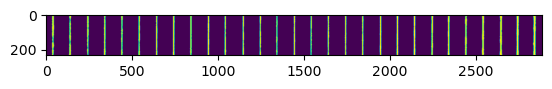

In [13]:
# leo la imagen (previamente rotada y cortada en ImageJ)


im = cv.imread('fotos\\calibracion filamento microscopio\\scales\\scale100um\\scale-04x.tif')

im_gs = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

_, im_th = cv.threshold(im_gs, 230, 255, cv.THRESH_BINARY)

im_th = cv.bitwise_not(im_th)

# para 100 um: 
objects = label(im_th)

large_objects = remove_small_objects(objects, min_size=200, connectivity=4)

im_th = large_objects>0

plt.figure()
plt.imshow(im_th)

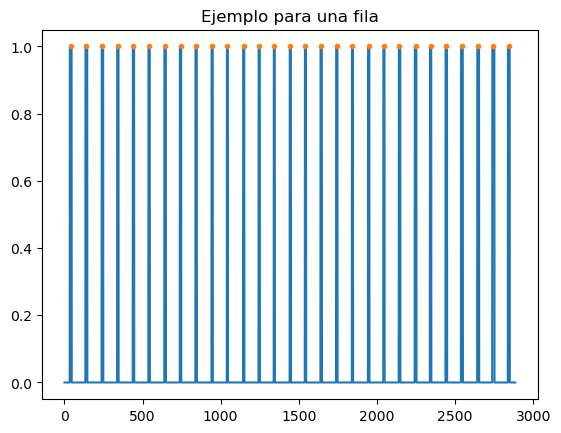

In [8]:
row = im_th[0]
i, dict = find_peaks(row)
plt.figure()
plt.title('Ejemplo para una fila')
plt.plot([i for i in range(0, len(row))], row)
plt.plot(i, row[i], '.')

In [11]:
width = np.mean(np.diff(i))
err_width = np.std(np.diff(i))/np.sqrt(len(np.diff(i)))
print(f'Para una fila de ejemplo:\nAncho = {width} +- {err_width}')

Para una fila de ejemplo:
Ancho = 100.10714285714286 +- 0.4205780937526424


In [12]:
masterlist = []
for row in im_th:
    i, dict = find_peaks(row)
    width = list(np.diff(i))
    masterlist += width
ancho_px = np.mean(masterlist)
err_px = np.std(masterlist)/np.sqrt(len(masterlist))
print(f'Promedio a lo largo de todo:\nAncho en px = {ancho_px} +- {err_px}\nUM_PER_PX10 = {100/ancho_px} +- {err_px*np.abs(100/(ancho_px**2))}')

Promedio a lo largo de todo:
Ancho en px = 100.07417582417582 +- 0.028853804499585845
UM_PER_PX10 = 0.9992587915557142 +- 0.0002881104698448655


# Medición de escala del microscopio para los filamentos de Laboratorio 6

Text(0, 0.5, 'Valor de gris [0,255]')

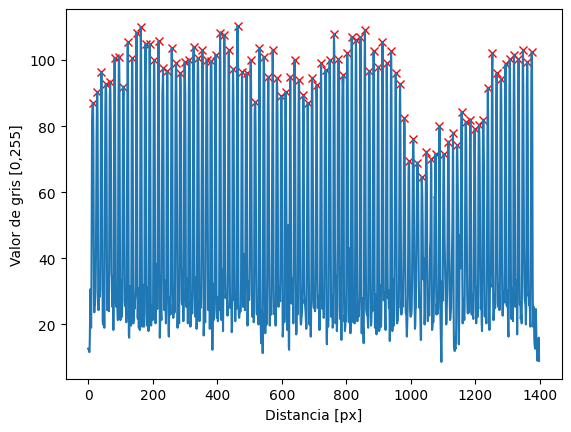

In [ ]:
peakdata = pd.read_csv('peak_data.csv')
x = peakdata['Distance_(pixels)']
y = peakdata['Gray_Value']

xpeaks = find_peaks(y,height=60, distance=3)[0]
ypeaks = y[xpeaks]
plt.plot(xpeaks,ypeaks,'x',color='r')
plt.plot(x,y)
plt.xlabel('Distancia [px]')
plt.ylabel('Valor de gris [0,255]')

In [ ]:
print(np.average( np.diff(xpeaks) / 0.01 ))

1361.0
